# KNN - Correntes de motor

Testando 30 rodadas com algoritmo **KNN** nos conjuntos de dados de correntes de motor com dados extraídos por _dwt_.

## Importando Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from random import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score, recall_score

## Características dos dados

| Características     |  Valor|
|:--------------------|------:|
| Classes             |      7|
| Amostras            |   7851|
| Dimensionalidade    |     38|
| Amostras por classe |       |

## Carregando dados e rótulos

In [2]:
def remove_nan(row):
    for i in range(len(row)):
        if np.isnan(row[i]):
            row[i] = 0
    return row

# Carregando data
# chain_raw = [remove_nan(element) for element in np.load('corrente1.npy')]

'''Carregando os 3 arquivos'''
ndarray = np.append(
    arr=np.load("corrente1.npy"),
    values=np.append(np.load("corrente2.npy"), np.load("corrente3.npy"), 0),
    axis=0)

chain_raw = [remove_nan(element) for element in ndarray]

# Carregando Rótulos
chain_labels = ['DesvioD1','DesvioD2','DesvioD3','DesvioD4','DesvioD5','DesvioA5',
                'MeanAD1','MeanAD2','MeanAD3','MeanAD4','MeanAD5','MeanADA5',
                'MedianAD1','MedianAD2','MedianAD3','MedianAD4','MedianAD5','MedianADA5',
                'KurtosisD1','KurtosisD2','KurtosisD3','KurtosisD4','KurtosisD5','KurtosisA5',
                'SkewnessD1','SkewnessD2','SkewnessD3','SkewnessD4','SkewnessD5','SkewnessA5',
                'EnergiaD1','EnergiaD2','EnergiaD3','EnergiaD4','EnergiaD5','EnergiaA5',
                'frequencia','carga']


chain_ds = {
    # Removendo coluna de 'classe' (posição 37) dos dados
    "data":[np.append(element[:37], element[38]) for element in chain_raw],
    "feature_names":chain_labels,
    "target":[classe[37] for classe in chain_raw],
    "target_names":["Normal", "HI-1", "HI-2", "HI-3", "LI-1", "LI-2", "LI-3"]
}

## Gerando DataFrame

In [3]:
chainDF = pd.DataFrame(data=chain_ds["data"], columns=chain_ds["feature_names"])
chainDF['classe'] = chain_ds['target']
chainDF

,DesvioD1,DesvioD2,DesvioD3,DesvioD4,DesvioD5,DesvioA5,MeanAD1,MeanAD2,MeanAD3,MeanAD4,...,SkewnessA5,EnergiaD1,EnergiaD2,EnergiaD3,EnergiaD4,EnergiaD5,EnergiaA5,frequencia,carga,classe
0,0.011068,0.012344,0.015708,0.043970,0.194858,4.328422,0.008821,0.009825,0.012597,0.037672,...,-0.008416,0.000104,0.000065,0.000053,0.000206,0.002024,0.998676,30.0,100.0,0.0
1,0.011120,0.012410,0.015607,0.044449,0.194661,4.321575,0.008882,0.009880,0.012495,0.037952,...,-0.010261,0.000106,0.000066,0.000052,0.000211,0.002026,0.998634,30.0,100.0,0.0
2,0.011137,0.012336,0.015913,0.048155,0.207760,4.318357,0.008886,0.009864,0.012703,0.040947,...,-0.009270,0.000106,0.000065,0.000054,0.000248,0.002310,0.997879,30.0,100.0,0.0
3,0.011085,0.012361,0.015787,0.045688,0.197433,4.336844,0.008823,0.009904,0.012679,0.038898,...,-0.009054,0.000104,0.000065,0.000053,0.000221,0.002069,0.998147,30.0,100.0,0.0
4,0.011101,0.012266,0.015716,0.043941,0.189413,4.342502,0.008833,0.009797,0.012583,0.037978,...,-0.011746,0.000104,0.000064,0.000052,0.000205,0.001900,0.998904,30.0,100.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7846,0.012272,0.014840,0.020940,0.094572,0.497473,3.279641,0.009772,0.011751,0.017396,0.083233,...,-0.006110,0.000219,0.000160,0.000159,0.001622,0.022454,0.975888,60.0,0.0,6.0
7847,0.012240,0.014735,0.021020,0.094695,0.498558,3.298809,0.009733,0.011655,0.017527,0.084111,...,-0.005818,0.000215,0.000156,0.000159,0.001609,0.022310,0.976734,60.0,0.0,6.0
7848,0.012176,0.014976,0.020883,0.094061,0.493900,3.266799,0.009675,0.011865,0.017336,0.082551,...,-0.004867,0.000217,0.000164,0.000160,0.001619,0.022329,0.976855,60.0,0.0,6.0
7849,0.012279,0.014980,0.020820,0.094614,0.496085,3.277904,0.009773,0.011855,0.017271,0.083364,...,-0.003115,0.000219,0.000163,0.000158,0.001627,0.022373,0.976795,60.0,0.0,6.0


In [4]:
chainDF.describe()

,DesvioD1,DesvioD2,DesvioD3,DesvioD4,DesvioD5,DesvioA5,MeanAD1,MeanAD2,MeanAD3,MeanAD4,...,SkewnessA5,EnergiaD1,EnergiaD2,EnergiaD3,EnergiaD4,EnergiaD5,EnergiaA5,frequencia,carga,classe
count,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,...,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000,7851.000000
mean,0.011659,0.013451,0.017627,0.063597,0.310475,3.312243,0.009272,0.010695,0.014307,0.054659,...,0.002218,0.000224,0.000147,0.000119,0.000808,0.009898,0.984748,45.091708,49.694306,3.006496
std,0.001102,0.001709,0.004701,0.030260,0.148925,0.809602,0.000859,0.001334,0.004020,0.025998,...,0.011577,0.000092,0.000059,0.000044,0.000560,0.007119,0.068205,9.991614,40.795070,1.977925
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.068359,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000
25%,0.011175,0.012369,0.014061,0.040414,0.192664,2.556062,0.008899,0.009862,0.011258,0.034660,...,-0.003327,0.000131,0.000098,0.000085,0.000333,0.003474,0.982502,35.000000,0.000000,1.000000
50%,0.011460,0.013052,0.016503,0.057861,0.282100,3.069992,0.009123,0.010388,0.013320,0.049756,...,0.004095,0.000220,0.000142,0.000111,0.000634,0.007886,0.991570,45.000000,50.000000,3.000000
75%,0.012027,0.014401,0.019949,0.080548,0.396623,4.180307,0.009574,0.011450,0.016239,0.069357,...,0.008388,0.000303,0.000187,0.000149,0.001255,0.016329,0.996287,55.000000,100.000000,5.000000
max,0.018549,0.020684,0.036409,0.172226,0.832394,5.370829,0.011858,0.015411,0.031664,0.150451,...,0.054295,0.000553,0.000413,0.000277,0.002222,0.025331,0.999192,60.000000,100.000000,6.000000


## Observando distribuição de classes

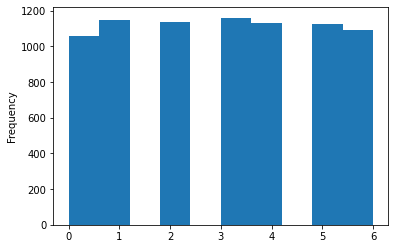

In [5]:
chainDF['classe'].plot(kind='hist')

## Realizando 1 rodada de Teste com KNN


- RODADA 0 - Semente 6522 -

- Acurácia 0.7143463497453311 -
- Sensibilidade [0.73333333 0.58610272 0.68907563 0.75561798 0.57185629 0.74029851
 0.93610224] -

              precision    recall  f1-score   support

      Normal       0.70      0.73      0.71       330
        HI-1       0.51      0.59      0.54       331
        HI-2       0.66      0.69      0.68       357
        HI-3       0.82      0.76      0.79       356
        LI-1       0.59      0.57      0.58       334
        LI-2       0.82      0.74      0.78       335
        LI-3       0.97      0.94      0.95       313

    accuracy                           0.71      2356
   macro avg       0.72      0.72      0.72      2356
weighted avg       0.72      0.71      0.72      2356

Matriz de confusão normalizada
[[0.73333333 0.08181818 0.09393939 0.02121212 0.05454545 0.01212121
  0.0030303 ]
 [0.09365559 0.58610272 0.0694864  0.0060423  0.2265861  0.01812689
  0.        ]
 [0.05882353 0.1232493  0.68907563 0.04481793 0

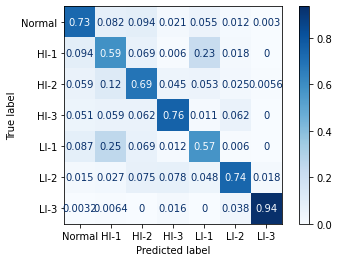

In [6]:
k_vizinhos = 5

chain_acc = []
chain_sns = []
used_seed = []

X, y = chain_ds['data'], chain_ds['target']

# Gerando inteiro aleatório para distribuição dos dados
semente = randint(0, 8001)
used_seed.append(semente)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=semente)

# Instanciando classificador
classifier = KNeighborsClassifier(n_neighbors=k_vizinhos)

# Treinando modelo
classifier.fit(X_train, y_train)

# Realizando teste de classificação
y_pred = classifier.predict(X_test)

# Adicionando resultados à lista
acc = accuracy_score(y_test, y_pred)
chain_acc.append(acc)

sns = recall_score(y_test, y_pred, average=None)
chain_sns.append(sns)

print("\n- RODADA 0 - Semente {} -\n".format(semente))
print("- Acurácia {acc} -\n- Sensibilidade {sns} -\n".format(acc=acc, sns=sns))

print(classification_report(y_test, y_pred, target_names=chain_ds['target_names']))

print("Matriz de confusão normalizada")
print(confusion_matrix(y_test, y_pred, normalize='true'))

plot_confusion_matrix(classifier, X_test, y_test,
                                display_labels=chain_ds['target_names'],
                                cmap=plt.cm.Blues,
                                normalize='true')

## Realizando 30 rodadas de Teste com KNN

In [7]:
for rodada in range(1, 30):

    # Gerando inteiro aleatório para distribuição dos dados
    semente = randint(0, 8001)
    while semente in used_seed:
        semente = randint(0, 8001)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=semente)

    # Instanciando classificador
    classifier = KNeighborsClassifier(n_neighbors=k_vizinhos)

    # Treinando modelo
    classifier.fit(X_train, y_train)

    # Realizando teste de classificação
    y_pred = classifier.predict(X_test)

    # Adicionando resultados à lista
    acc = accuracy_score(y_test, y_pred)
    chain_acc.append(acc)

    sns = recall_score(y_test, y_pred, average=None)
    chain_sns.append(sns)

    print("\n- RODADA {turn} - Semente {seed} -\n".format(turn=rodada, seed=semente))
    print("- Acurácia {acc} -\n- Sensibilidade {sns} -\n".format(acc=acc, sns=sns))

    print(classification_report(y_test, y_pred, target_names=chain_ds['target_names']))

    print("Matriz de confusão normalizada")
    print(confusion_matrix(y_test, y_pred, normalize='true'))

    # Descomente a linha abaixo para plotar matriz de confusão normalizada
    # plot_confusion_matrix(classifier, X_test, y_test, display_labels=chain_ds['target_names'], cmap=plt.cm.Blues, normalize='true')

        LI-1       0.59      0.54      0.56       358
        LI-2       0.83      0.75      0.78       342
        LI-3       0.97      0.94      0.95       338

    accuracy                           0.71      2356
   macro avg       0.71      0.71      0.71      2356
weighted avg       0.72      0.71      0.71      2356

Matriz de confusão normalizada
[[0.68581081 0.08108108 0.0777027  0.06756757 0.06756757 0.01689189
  0.00337838]
 [0.09365559 0.58006042 0.04531722 0.03021148 0.22960725 0.01510574
  0.0060423 ]
 [0.04899135 0.08357349 0.68299712 0.07204611 0.07204611 0.02881844
  0.01152738]
 [0.03197674 0.0494186  0.04651163 0.79360465 0.00581395 0.07267442
  0.        ]
 [0.08659218 0.27932961 0.05865922 0.02234637 0.54189944 0.00837989
  0.0027933 ]
 [0.03216374 0.05263158 0.05555556 0.07309942 0.03216374 0.74561404
  0.00877193]
 [0.00591716 0.0147929  0.         0.0147929  0.00887574 0.01775148
  0.93786982]]

- RODADA 16 - Semente 7008 -

- Acurácia 0.7139219015280136 -
- Sen

## Gerando DataFrame de Acurácia e Sensibilidade por rodada

In [8]:
metricDF = pd.DataFrame(
    data=chain_sns,
    columns=['S - {}'.format(name) for name in chain_ds['target_names']])

metricDF['Acurácia'] = chain_acc
metricDF

,S - Normal,S - HI-1,S - HI-2,S - HI-3,S - LI-1,S - LI-2,S - LI-3,Acurácia
0,0.733333,0.586103,0.689076,0.755618,0.571856,0.740299,0.936102,0.714346
1,0.730539,0.577982,0.702786,0.772455,0.519774,0.795518,0.917431,0.715620
2,0.726994,0.591954,0.693452,0.811966,0.541311,0.772189,0.947712,0.722411
3,0.708861,0.561605,0.686813,0.762040,0.511041,0.801829,0.951368,0.711800
4,0.785489,0.554598,0.694444,0.766764,0.525424,0.811765,0.948485,0.723684
5,0.720238,0.633333,0.718750,0.769679,0.563050,0.798220,0.962751,0.739389
6,0.730000,0.560647,0.674419,0.770950,0.534286,0.783019,0.933333,0.706706
7,0.767742,0.593373,0.724719,0.767705,0.549133,0.745856,0.952862,0.724533
8,0.723214,0.604938,0.669540,0.789916,0.548485,0.787234,0.933735,0.723260
9,0.723404,0.603077,0.683706,0.764535,0.520231,0.804533,0.962428,0.724958


In [9]:
metricDF.describe()

,S - Normal,S - HI-1,S - HI-2,S - HI-3,S - LI-1,S - LI-2,S - LI-3,Acurácia
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.725050,0.575337,0.688550,0.782417,0.544612,0.774337,0.941371,0.717629
std,0.024105,0.023058,0.022334,0.018435,0.025414,0.022620,0.012788,0.008586
min,0.684543,0.535088,0.634006,0.752874,0.501502,0.728863,0.908824,0.700764
25%,0.712590,0.560330,0.672336,0.768199,0.527639,0.761183,0.934327,0.711163
50%,0.723828,0.575363,0.690104,0.782378,0.547648,0.772780,0.942823,0.716256
75%,0.736807,0.590491,0.702622,0.798008,0.560021,0.794131,0.950153,0.723154
max,0.785489,0.633333,0.729577,0.813031,0.616613,0.811765,0.962751,0.739389
